## Wine quality EDA Mini Project

In this file I Investigate and perform EDA on the winequality_2.csv file. Below I have summarised my findings: 
- 'Quality' is my chosen target variable
- My gut says the red/white wine field will muddy the results, and if I was actually modelling this using linear regression, I'd likely try creating a model  for each, rather than a single model which has a red/white wine column.
- There were very few null values, easily remedied
- My investigations of the correlations of the dataset (and subsequently separated Dataframes for red wine and white wine) showed that no single feature had a strong correlation with quality. Therefore any models built using this data would likely need multiple features included, and some trial and error may be required to find the best combination of features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
wine = pd.read_csv('winequality_2.csv')


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
wine.shape

(6497, 13)

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 1
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

# Fixing missing values

I defined the function below which will take a Pandas Series and replace all the NA values with another random non-null value from the same Data Series. The purpose is to replace the NA values but retain the original distribution of data, rather than replacing with the mode which would inevitably skew the data.

Note that all the features of the wine_quality dataset are already numerical rather than categorical, so I will simply replace values with the mean rather than using the function below.

In [7]:
def replace_nan_with_random(series):
    """Replace NaN values in a Pandas Series with random samples from the non-NaN values."""
    # Remove null values
    non_na_series = series.dropna()

    # If the series is empty after removing nulls, return the original series
    if non_na_series.empty:
        return series

    # Use .apply() to replace NaN values with random samples
    return series.apply(lambda x: non_na_series.sample(1).iloc[0] if pd.isna(x) else x)

In [8]:
#Dropping unneeded columns

#All columns look like they could be useful, so I will not drop any values for now. I will reserve judgement until I've looked at the correlation info.

In [9]:
wine["chlorides"].value_counts()

chlorides
0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.422      1
0.222      1
0.143      1
0.250      1
0.212      1
Name: count, Length: 215, dtype: int64

In [10]:
wine["chlorides"].fillna(wine["chlorides"].mean(), inplace=True)

In [11]:
wine["density"].value_counts()

density
0.99760    69
0.99720    69
0.99800    64
0.99200    64
0.99280    63
           ..
0.99852     1
0.99833     1
0.98853     1
0.99589     1
0.98941     1
Name: count, Length: 998, dtype: int64

In [12]:
wine["density"].fillna(wine["density"].mean(), inplace=True)

In [13]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

## Checking Outliers

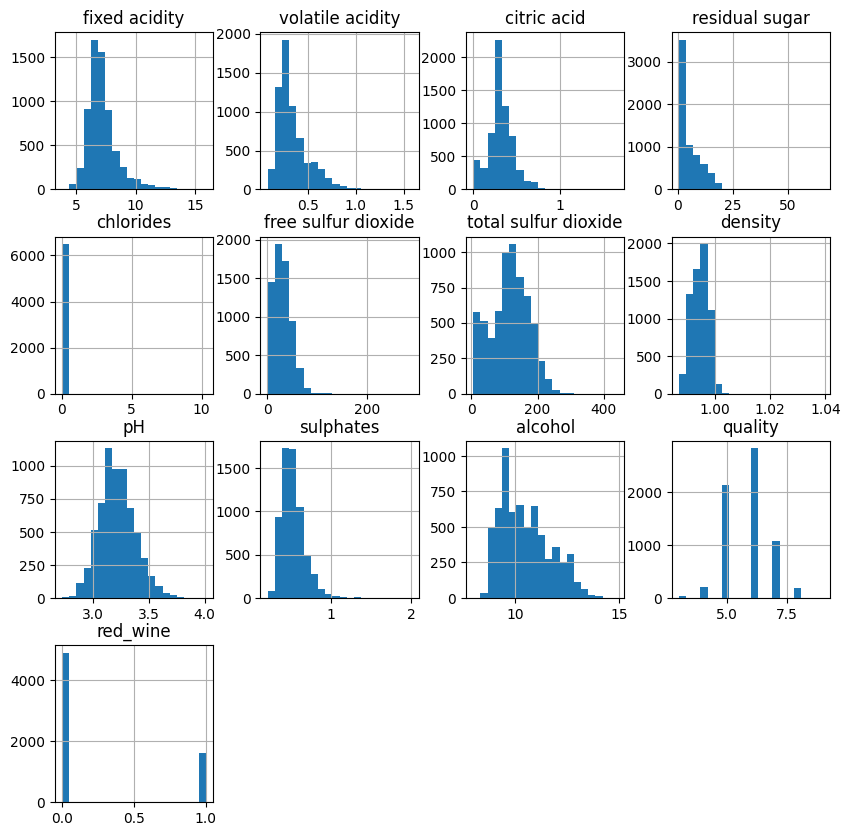

In [14]:
wine.hist(bins=20,figsize=(10,10))
plt.show()

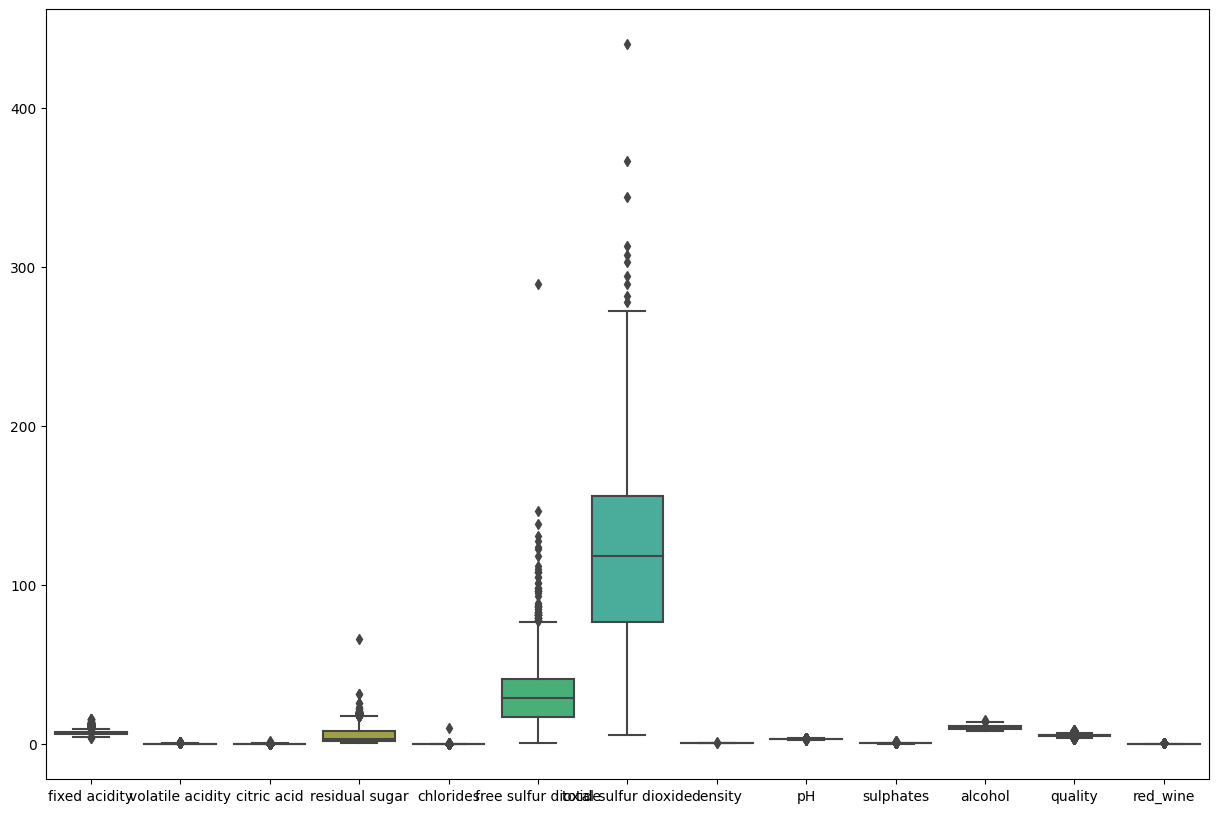

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine)
plt.show()

In [16]:
wine.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.084461,-0.282735,-0.329054,0.458905,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.115973,-0.352557,-0.414476,0.271269,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,-0.000083,0.133126,0.195242,0.096175,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.042611,0.402871,0.495482,0.552694,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.084461,0.115973,-0.000083,-0.042611,1.000000,-0.062425,-0.076659,0.102159,0.020197,0.105483,-0.078060,-0.064390,0.156906
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.062425,1.000000,0.720934,0.025796,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.076659,0.720934,1.000000,0.032540,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458905,0.271269,0.096175,0.552694,0.102159,0.025796,0.032540,1.000000,0.011350,0.259362,-0.686698,-0.305721,0.390372
pH,-0.252700,0.261454,-0.329808,-0.267320,0.020197,-0.145854,-0.238413,0.011350,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.105483,-0.188457,-0.275727,0.259362,0.192123,1.000000,-0.003029,0.038485,0.487218


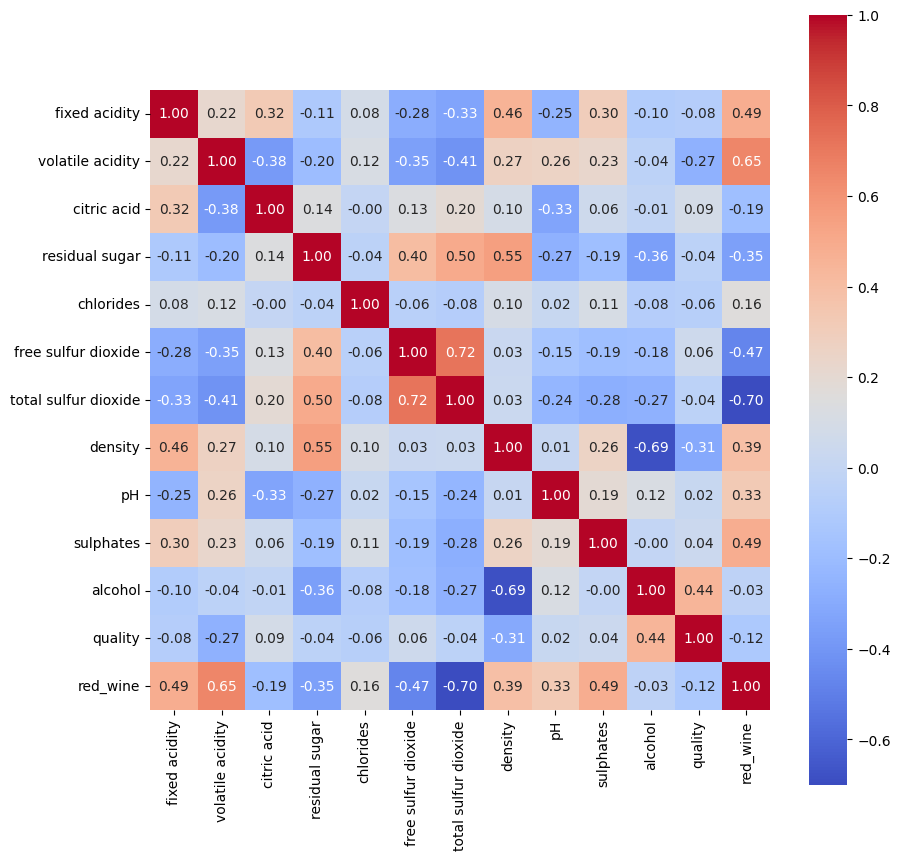

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

First things that stick out to me:
- 'free sulfur dioxide' and 'total sulfur dioxide' are highly correlated with each other.

I am now going to split the data frame into two separate datasets for white wine and red wine to see if there are stronger correlations emerging

In [18]:
#Splitting the DF into two seperate DFs
white_wine = wine[wine['red_wine'] == 0]
red_wine = wine[wine['red_wine'] == 1]

White wine first

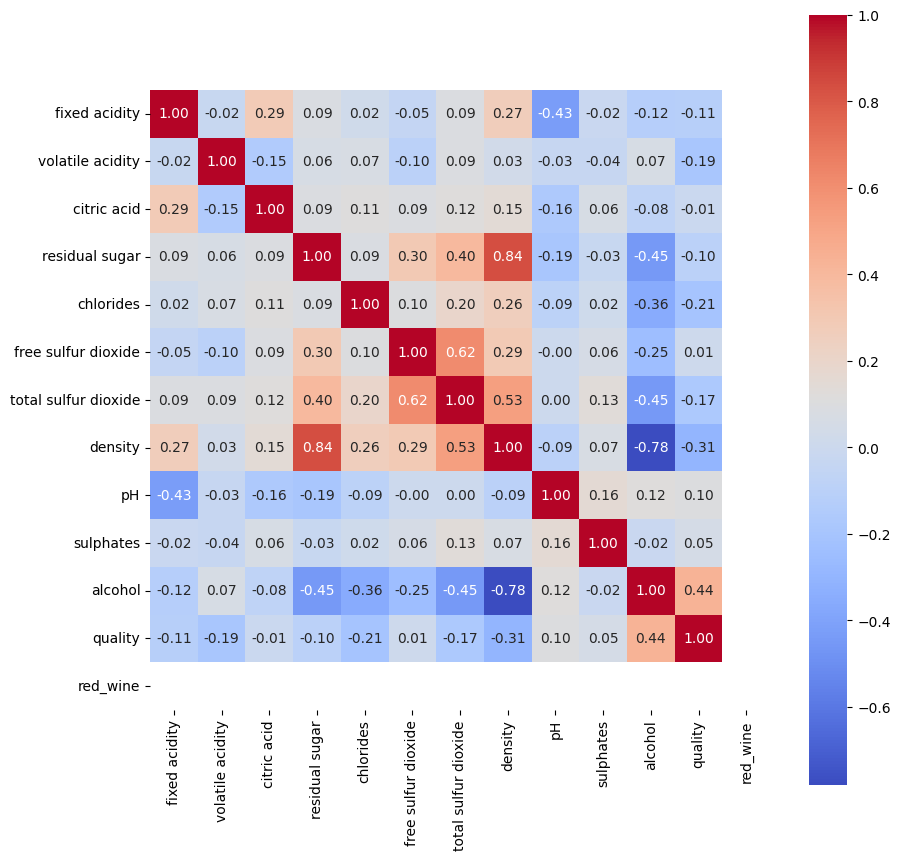

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(white_wine.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

Things worth noting:
- High correlation between 'residual sugar' and 'density'
- Also high negative correlation between 'alcohol' and 'density'
- Relatively high correlation still between 'free sulfur dioxide' and 'total sulfur dioxide'

Now checking red wine

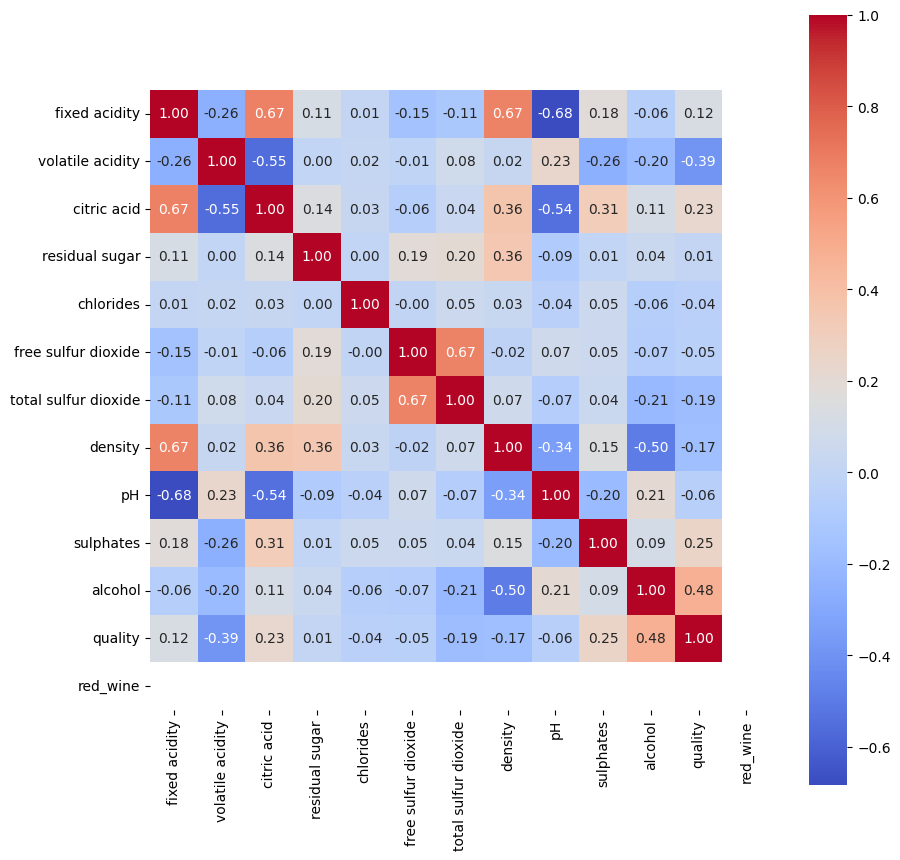

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(red_wine.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

First things that stick out to me:
- Relatively high multicollinearity between 'fixed acidity', 'citric acid', 'pH'
- Relatively high correlation still between 'free sulfur dioxide' and 'total sulfur dioxide'

Regarding the quality of the wine - No particularly strong correlations emerged. There is a weak correlation between alcohol and quality.

In [21]:
from ydata_profiling import ProfileReport
#from pydantic_settings import BaseSettings
#from pandas_profiling import ProfileReport

In [1]:
report = ProfileReport(wine, title='Wine Quality Report')
report


NameError: name 'ProfileReport' is not defined

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


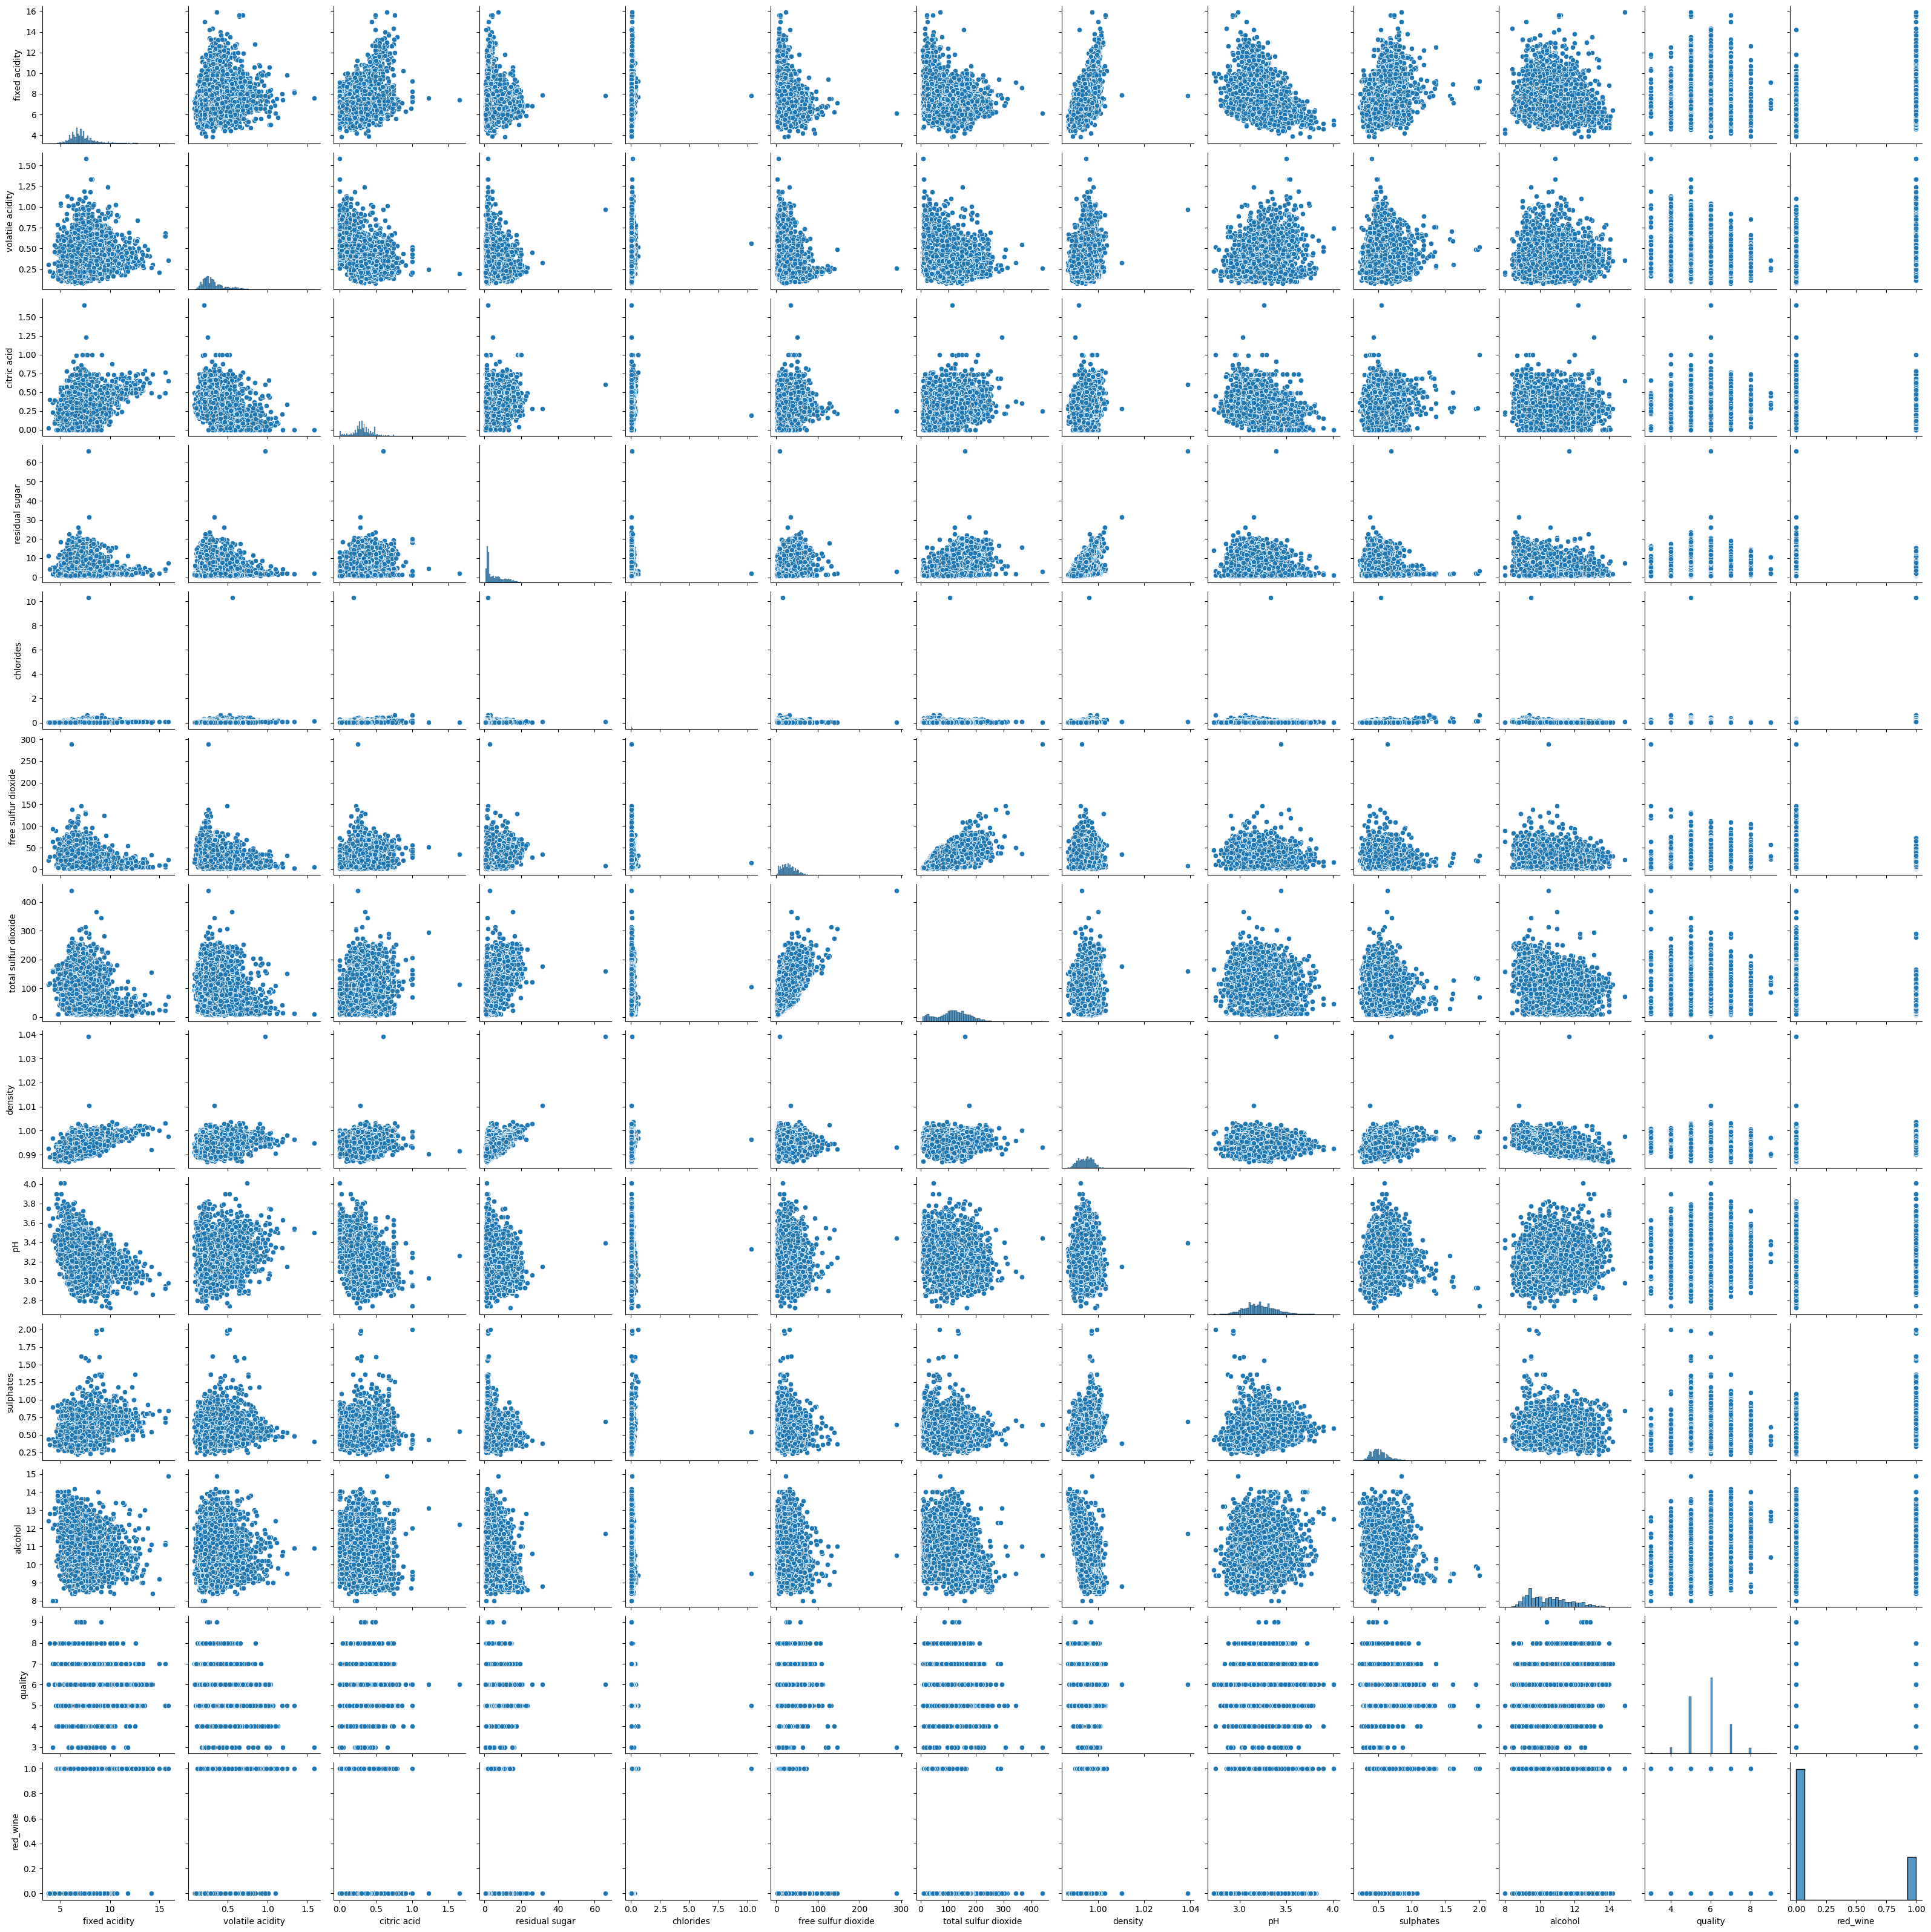

In [23]:
sns.pairplot(wine)

## Bar plots to highlight various correlations with quality

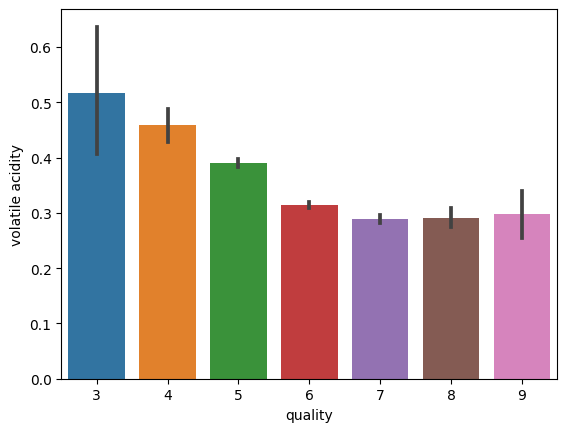

In [24]:
sns.barplot(x='quality', y='volatile acidity', data = wine)
plt.show()

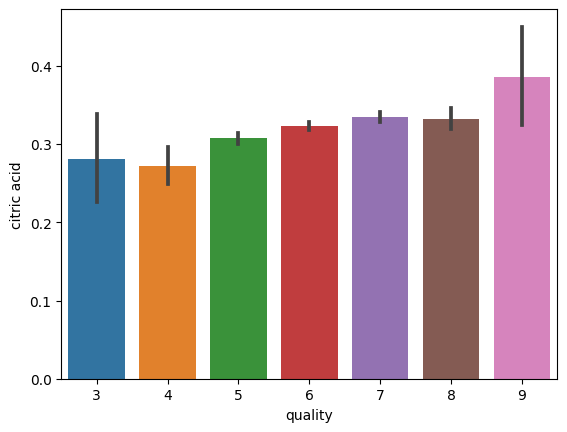

In [25]:
sns.barplot(x='quality', y='citric acid', data = wine)
plt.show()

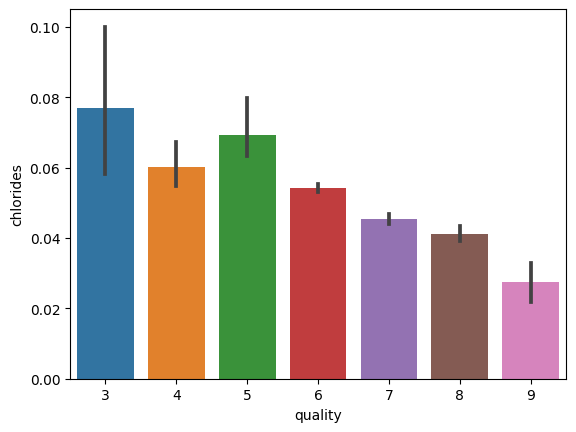

In [26]:
sns.barplot(x='quality', y='chlorides', data = wine)
plt.show()

There are a number of fields which show a weak corrlation with our target variable 'quality'.